In [ ]:
Q1. Plot the following activation functions and their derivatives in Python. 
Additionally, discuss their limitations concerning the issues of vanishing and 
exploding gradients. 
 Linear 
 Sigmoid 
 Tanh 
 Softmax 
 Relu 
 weakyRelu

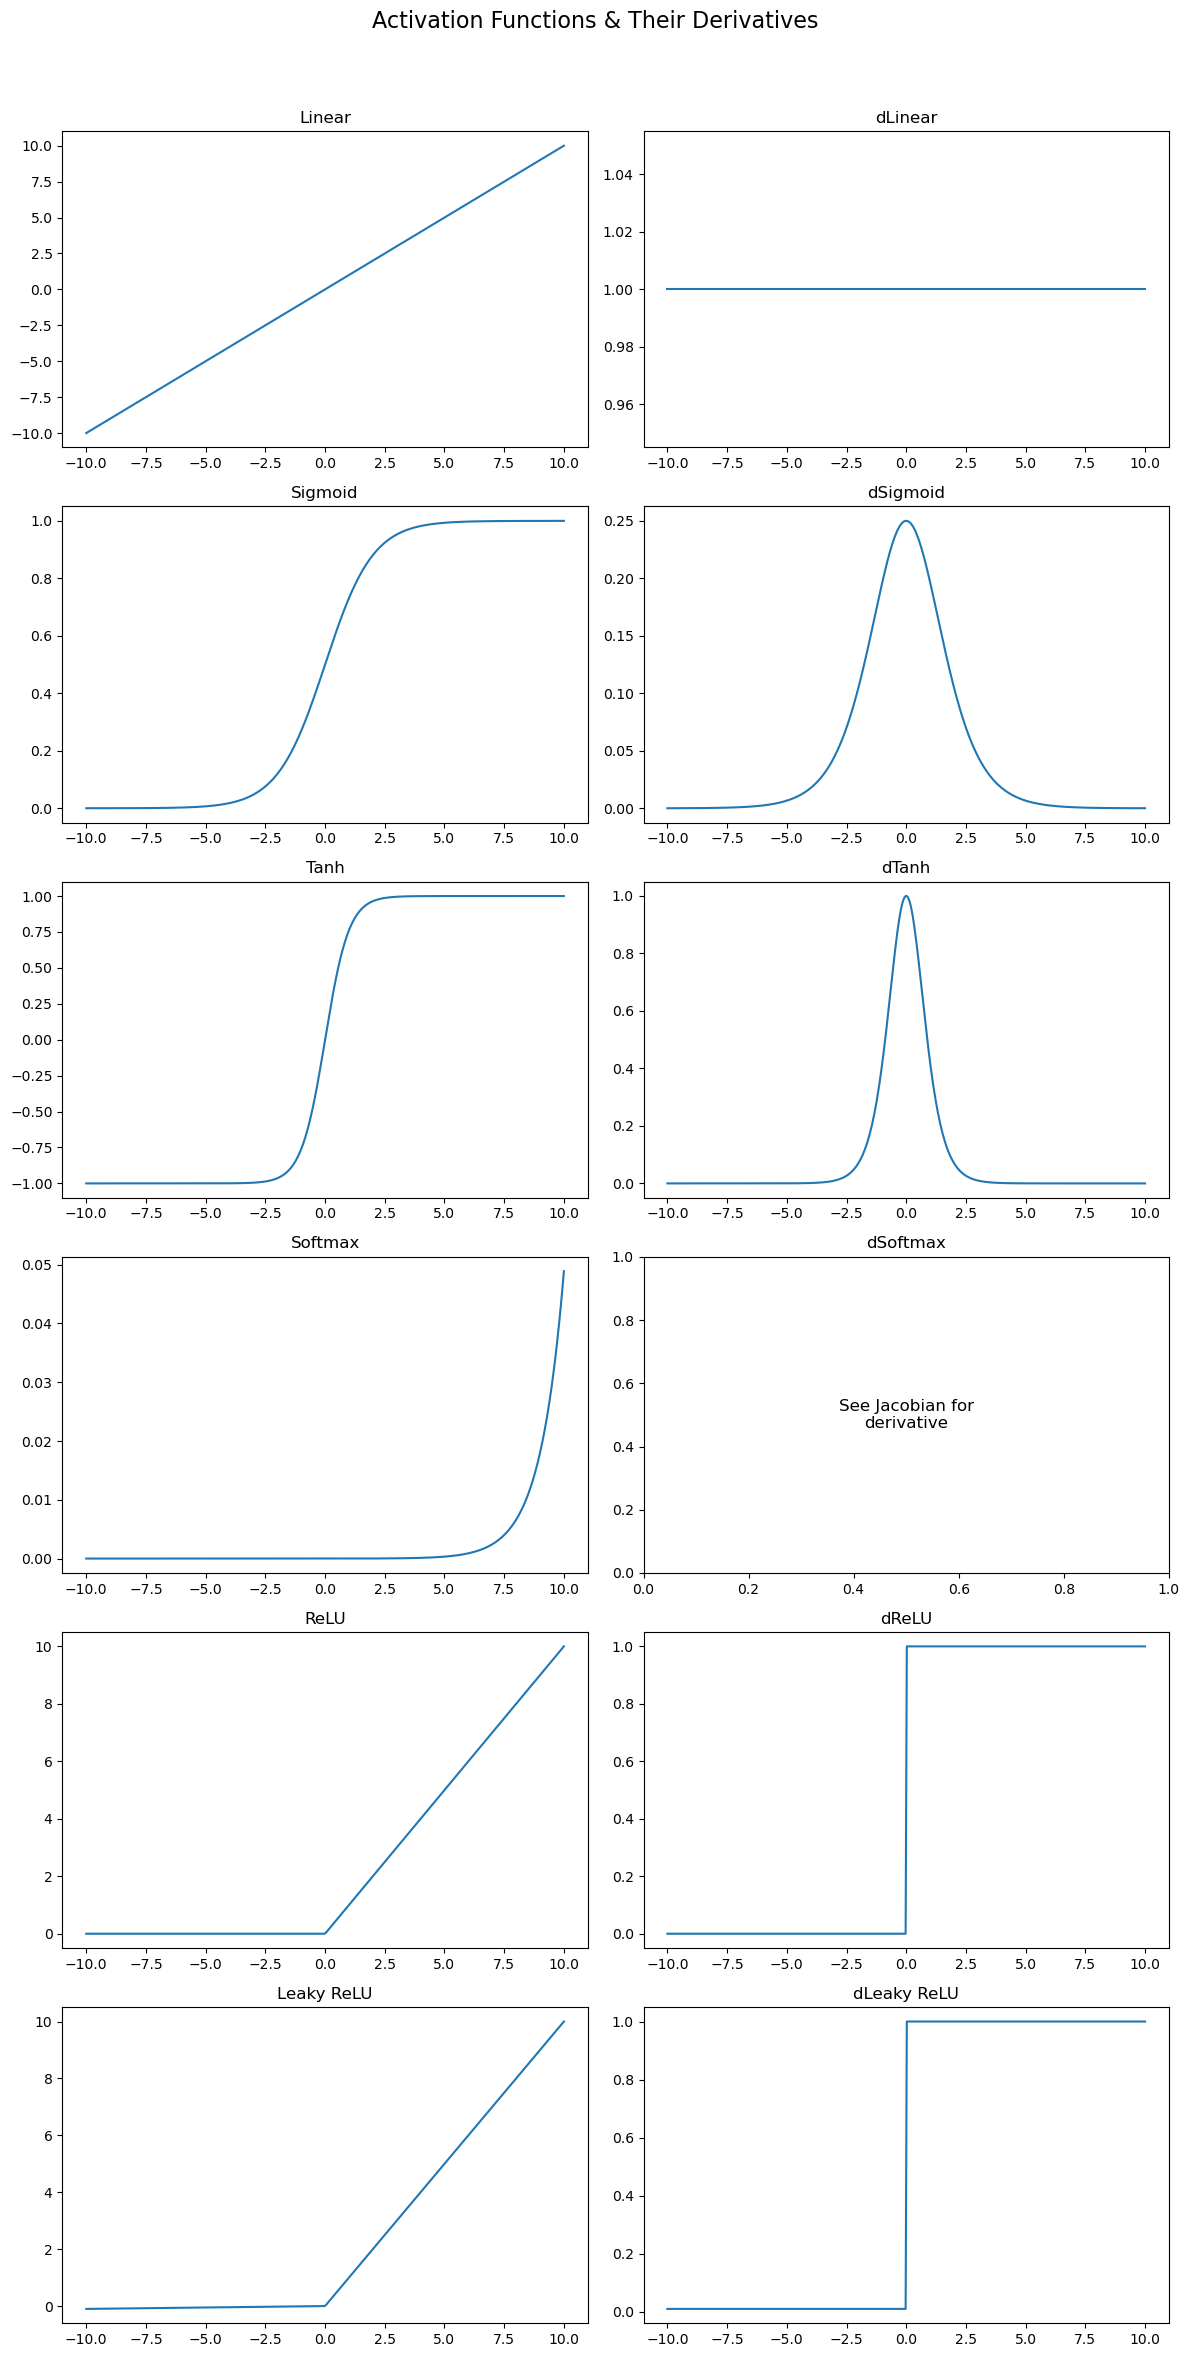

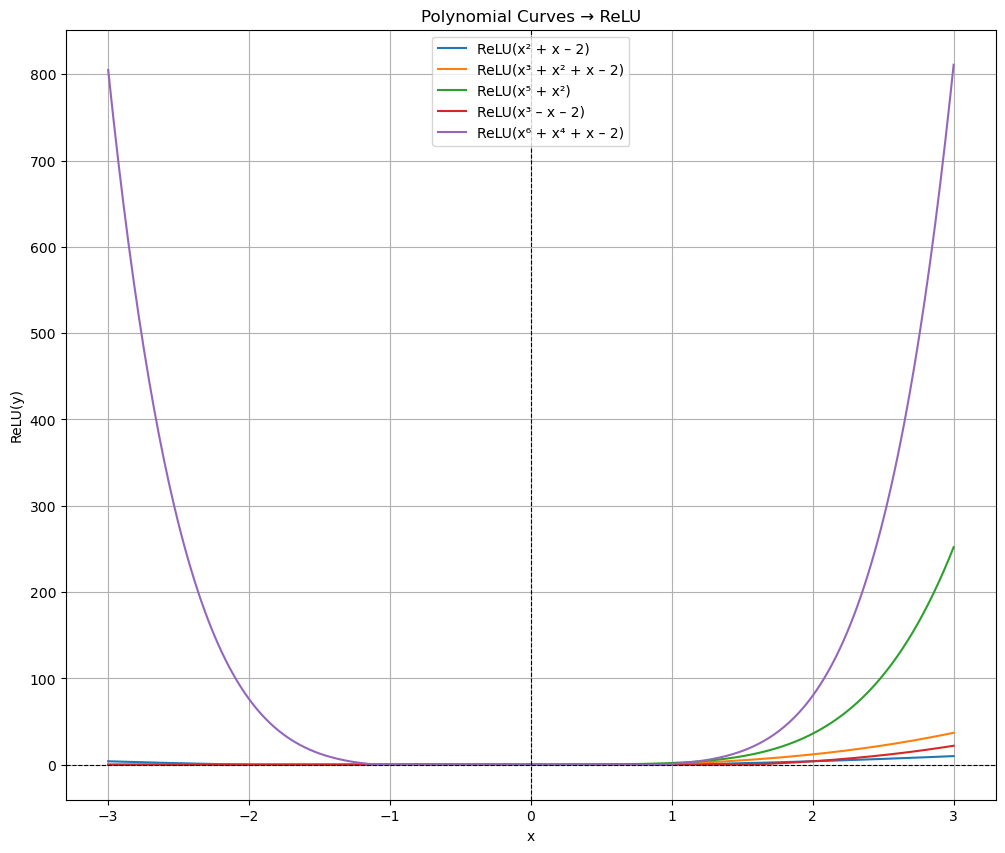


Original Data:
    feature1  feature2  feature3  feature4 feature5
0       1.0      10.0     100.0       NaN        A
1       2.0      20.0     200.0       2.5        B
2       NaN      30.0     300.0       3.5        A
3       4.0       NaN     400.0       4.5      NaN
4       5.0      50.0       NaN       5.5        B 

After Imputation:
    feature1  feature2  feature3  feature4 feature5
0       1.0      10.0     100.0       4.0        A
1       2.0      20.0     200.0       2.5        B
2       3.0      30.0     300.0       3.5        A
3       4.0      27.5     400.0       4.5        A
4       5.0      50.0     250.0       5.5        B 

After Min–Max Scaling:
    feature1  feature2  feature3  feature4 feature5
0      0.00    0.0000  0.000000  0.500000        A
1      0.25    0.2500  0.333333  0.000000        B
2      0.50    0.5000  0.666667  0.333333        A
3      0.75    0.4375  1.000000  0.666667        A
4      1.00    1.0000  0.500000  1.000000        B


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ----------------------------------------
# Part 1: Activation Functions & Derivatives
# ----------------------------------------

def linear(x):        return x
def d_linear(x):      return np.ones_like(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):          return np.tanh(x)
def d_tanh(x):        return 1 - np.tanh(x)**2

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e, axis=0)
# softmax derivative is context‑dependent (Jacobian), so we skip plotting it

def relu(x):          return np.maximum(0, x)
def d_relu(x):        return np.where(x > 0, 1, 0)

def leaky_relu(x, α=0.01):
    return np.where(x > 0, x, α * x)
def d_leaky_relu(x, α=0.01):
    return np.where(x > 0, 1, α)

# Prepare x‑axis
x_act = np.linspace(-10, 10, 400)

# Plot
fig, axes = plt.subplots(6, 2, figsize=(12, 24))
fig.suptitle("Activation Functions & Their Derivatives", fontsize=16)

# Linear
axes[0,0].plot(x_act, linear(x_act));     axes[0,0].set_title("Linear")
axes[0,1].plot(x_act, d_linear(x_act));   axes[0,1].set_title("dLinear")

# Sigmoid
axes[1,0].plot(x_act, sigmoid(x_act));    axes[1,0].set_title("Sigmoid")
axes[1,1].plot(x_act, d_sigmoid(x_act));  axes[1,1].set_title("dSigmoid")

# Tanh
axes[2,0].plot(x_act, tanh(x_act));       axes[2,0].set_title("Tanh")
axes[2,1].plot(x_act, d_tanh(x_act));     axes[2,1].set_title("dTanh")

# Softmax
axes[3,0].plot(x_act, softmax(x_act));    axes[3,0].set_title("Softmax")
axes[3,1].text(0.5, 0.5, "See Jacobian for\nderivative", 
               ha='center', va='center', fontsize=12)
axes[3,1].set_title("dSoftmax")

# ReLU
axes[4,0].plot(x_act, relu(x_act));       axes[4,0].set_title("ReLU")
axes[4,1].plot(x_act, d_relu(x_act));     axes[4,1].set_title("dReLU")

# Leaky ReLU
axes[5,0].plot(x_act, leaky_relu(x_act));      axes[5,0].set_title("Leaky ReLU")
axes[5,1].plot(x_act, d_leaky_relu(x_act));    axes[5,1].set_title("dLeaky ReLU")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


# ----------------------------------------
# Part 2: Polynomial Curves through ReLU
# ----------------------------------------

def curve_relu_plots():
    x = np.linspace(-3, 3, 500)
    defs = [
        ("x² + x – 2",      lambda x: x**2 + x - 2),
        ("x³ + x² + x – 2", lambda x: x**3 + x**2 + x - 2),
        ("x⁵ + x²",         lambda x: x**5 + x**2),
        ("x³ – x – 2",      lambda x: x**3 - x - 2),
        ("x⁶ + x⁴ + x – 2", lambda x: x**6 + x**4 + x - 2),
    ]
    plt.figure(figsize=(12,10))
    for label, fn in defs:
        y = fn(x)
        plt.plot(x, relu(y), label=f"ReLU({label})")
    plt.title("Polynomial Curves → ReLU")
    plt.xlabel("x")
    plt.ylabel("ReLU(y)")
    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='k', linestyle='--', linewidth=0.8)
    plt.grid(True)
    plt.legend()
    plt.show()

curve_relu_plots()


# ----------------------------------------
# Part 3: DataFrame Impute & MinMax Scaling
# ----------------------------------------

# Sample dataset with nulls
df = pd.DataFrame({
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [10, 20, 30, np.nan, 50],
    'feature3': [100, 200, 300, 400, np.nan],
    'feature4': [np.nan, 2.5, 3.5, 4.5, 5.5],
    'feature5': ['A', 'B', 'A', np.nan, 'B']
})

print("\nOriginal Data:\n", df, "\n")

# Identify numeric vs categorical
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean()))
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("After Imputation:\n", df, "\n")

# Scale numeric
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("After Min–Max Scaling:\n", df)


In [ ]:
Q.2 Consider a "semi-arid soil types" dataset based on various soil properties. The dataset includes 
features such as soil texture, pH, moisture content, organic matter, and more. The objective is 
to use a deep neural network to predict soil types (e.g., sandy, loamy, clayey) based on these 
features. Design a simple deep learning sequential model with the following specifications: 
 Two hidden layers with 64 and 32 neurons, respectively 
 ReLU activation function 
 A dropout rate of 30% to avoid overfitting 
 Classification into three categories (or more if needed) for soil classification

Epoch 1/50


C:\Users\Amarjeet Raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5480 - loss: 0.9417 - val_accuracy: 0.9781 - val_loss: 0.3377
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9582 - loss: 0.3240 - val_accuracy: 0.9906 - val_loss: 0.1085
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9823 - loss: 0.1304 - val_accuracy: 0.9937 - val_loss: 0.0521
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0822 - val_accuracy: 0.9937 - val_loss: 0.0328
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0635 - val_accuracy: 0.9937 - val_loss: 0.0241
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0507 - val_accuracy: 0.9937 - val_loss: 0.0214
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9937 - val_loss: 0.0159
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0255 - val_accuracy: 0.9937 - val_loss: 0.0148
Epo

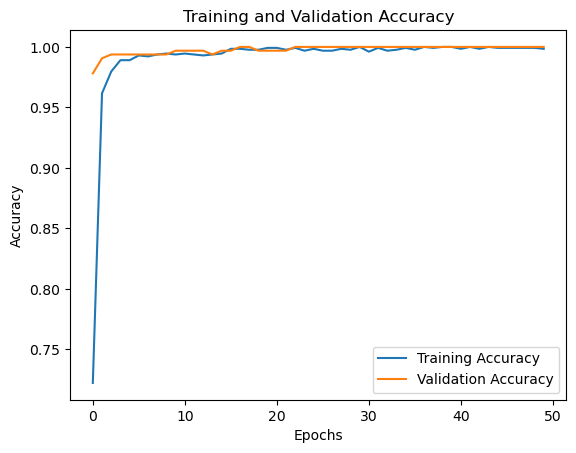

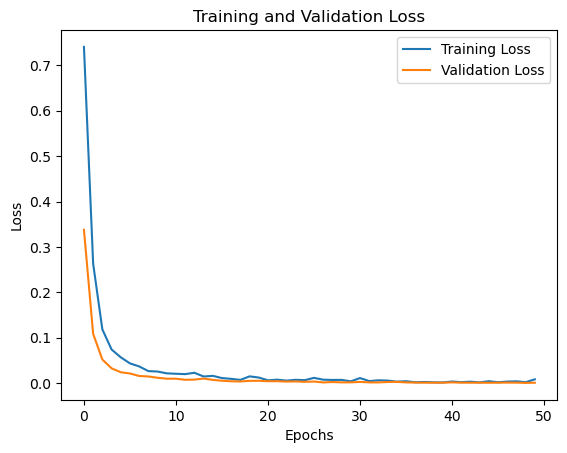

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'semi_arid_soil_dataset_updated.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Handle missing data by dropping rows with missing values
df = df.dropna()

# Separate features and target
features = [
    "Soil_Texture_Sand(%)", 
    "Soil_Texture_Silt(%)", 
    "Soil_Texture_Clay(%)", 
    "pH", 
    "Moisture_Content(%)", 
    "Organic_Matter(%)", 
    "Bulk_Density(g/cm³)", 
    "Electrical_Conductivity(dS/m)", 
    "Cation_Exchange_Capacity(meq/100g)", 
    "Field_Capacity(%)"
]
target = "Soil_Type"

X = df[features]
y = df[target]

# Encode target variable
y_encoded = pd.get_dummies(y).values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

# Visualize Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Visualize Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

